In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('inmuebles_sin_nulos.csv') 
data

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,0,01/01/04 0:00,Parking,Alquiler,Lleida,291.0,2133903,19/06/04 0:00,Carmen
1,1,01/01/04 0:00,Local,Venta,Girona,185.0,1945424,19/04/04 0:00,Pedro
2,2,01/01/04 0:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/04 0:00,Joaquín
3,3,02/01/04 0:00,Parking,Alquiler,Girona,285.0,1121906,27/04/04 0:00,Jesús
4,4,02/01/04 0:00,Suelo,Venta,Tarragona,152.0,185000,10/07/04 0:00,María
...,...,...,...,...,...,...,...,...,...
3332,3332,29/04/07 0:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/30 0:00,María
3333,3333,29/04/07 0:00,Piso,Alquiler,Girona,55.0,454080,19/06/30 0:00,María
3334,3334,30/04/07 0:00,Suelo,Venta,Tarragona,78.0,740688,19/06/30 0:00,María
3335,3335,30/04/07 0:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/30 0:00,María


In [23]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0      0
Fecha Alta      0
Tipo            0
Operación       0
Provincia       0
Superficie      0
Precio Venta    0
Fecha Venta     0
Vendedor        0
dtype: int64

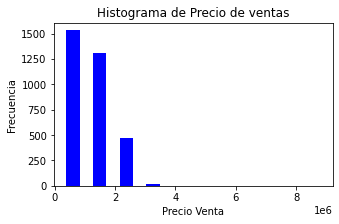

In [24]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=data["Precio Venta"], color='blue', rwidth=0.50)
plt.title('Histograma de Precio de ventas')
plt.xlabel('Precio Venta')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

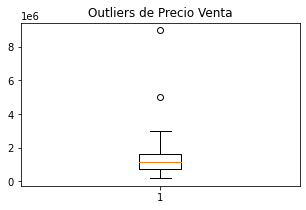

In [25]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data["Precio Venta"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

*****************************MÉTODO DE DESVIACIÓN ESTÁNDAR*********************************

In [26]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data["Precio Venta"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 3124989.477628636
Limite inferior permitido -713862.1387014559


In [27]:
#Encontramos Ouliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
16,16,05/01/04 0:00,Casa,Alquiler,Tarragona,58.0,5000000,08/10/04 0:00,Luisa
29,29,12/01/04 0:00,Local,Alquiler,Tarragona,201.0,9000000,04/08/04 0:00,Carmen


In [28]:
#Obtenemos datos limpios
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,0,01/01/04 0:00,Parking,Alquiler,Lleida,291.0,2133903,19/06/04 0:00,Carmen
1,1,01/01/04 0:00,Local,Venta,Girona,185.0,1945424,19/04/04 0:00,Pedro
2,2,01/01/04 0:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/04 0:00,Joaquín
3,3,02/01/04 0:00,Parking,Alquiler,Girona,285.0,1121906,27/04/04 0:00,Jesús
4,4,02/01/04 0:00,Suelo,Venta,Tarragona,152.0,185000,10/07/04 0:00,María
...,...,...,...,...,...,...,...,...,...
3332,3332,29/04/07 0:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/30 0:00,María
3333,3333,29/04/07 0:00,Piso,Alquiler,Girona,55.0,454080,19/06/30 0:00,María
3334,3334,30/04/07 0:00,Suelo,Venta,Tarragona,78.0,740688,19/06/30 0:00,María
3335,3335,30/04/07 0:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/30 0:00,María


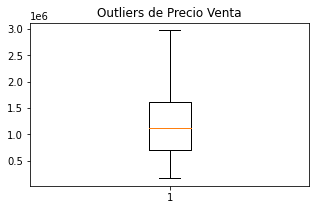

In [29]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["Precio Venta"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

*****************************MÉTODO DE IQR (RANGO INTER QUARTILICO)*********************************

In [30]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["Precio Venta"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido 3011746.5
Limite inferior permitido -693177.5


In [31]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
16,16,05/01/04 0:00,Casa,Alquiler,Tarragona,58.0,5000000,08/10/04 0:00,Luisa
29,29,12/01/04 0:00,Local,Alquiler,Tarragona,201.0,9000000,04/08/04 0:00,Carmen


In [32]:
#Obtenemos datos limpios
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

,Unnamed: 0,Fecha Alta,Tipo,Operación,Provincia,Superficie,Precio Venta,Fecha Venta,Vendedor
0,0,01/01/04 0:00,Parking,Alquiler,Lleida,291.0,2133903,19/06/04 0:00,Carmen
1,1,01/01/04 0:00,Local,Venta,Girona,185.0,1945424,19/04/04 0:00,Pedro
2,2,01/01/04 0:00,Oficina,Alquiler,Girona,82.0,1121906,08/11/04 0:00,Joaquín
3,3,02/01/04 0:00,Parking,Alquiler,Girona,285.0,1121906,27/04/04 0:00,Jesús
4,4,02/01/04 0:00,Suelo,Venta,Tarragona,152.0,185000,10/07/04 0:00,María
...,...,...,...,...,...,...,...,...,...
3332,3332,29/04/07 0:00,Industrial,Alquiler,Lleida,221.0,1450644,19/06/30 0:00,María
3333,3333,29/04/07 0:00,Piso,Alquiler,Girona,55.0,454080,19/06/30 0:00,María
3334,3334,30/04/07 0:00,Suelo,Venta,Tarragona,78.0,740688,19/06/30 0:00,María
3335,3335,30/04/07 0:00,Piso,Alquiler,Barcelona,88.0,397408,19/06/30 0:00,María


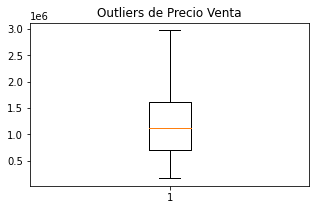

In [33]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["Precio Venta"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama